# PROJECT 4: Wrangle and Analyze data 

##### Context
>**GOAL**:   
*Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.*

## Key Points
#### Key points to keep in mind when data wrangling for this project:

> You only want `original ratings` (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.  
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least `8 quality issues` and at least `2 tidiness` issues in this dataset.  
Cleaning includes merging individual pieces of data according to the rules of tidy data.  
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.  
You do `not need to gather the tweets beyond August 1st, 2017`. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

# 1) Gathering Data 
**Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:**



>The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv  
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv  
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.  
If you decide to complete your project in the Project Workspace, note that you can upload files to the Jupyter Notebook Workspace by clicking the "Upload" button in the top righthand corner of the dashboard.

In [1]:
import pandas as pd 
import numpy as np 
import requests as re
import tweepy

## 1.1) WeRateDogs Twitter archive  


##### The Data
`Enhanced Twitter Archive`

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

In [2]:
twitter_archive = pd.read_csv(r'recursos/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 1.2)  Requests the tweet image predictions file

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

##### Dwownloading the file

In [4]:
import requests 
import os
import pandas as pd

In [5]:
folder_name = 'tweet_image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
os.listdir(folder_name)

['image-predictions.tsv']

In [8]:
# ("rating-data.tsv",sep='\t')
image_pred = pd.read_csv(r'tweet_image/image-predictions.tsv', sep='\t')
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## 1.2) Query Twitter Data

##### Additional Data via the Twitter API

>Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

In [9]:
import tweepy
import time

In [10]:
consumer_key = 'YtN3LAveLTcmcLKxOuKFctknS'
consumer_secret = 'bTq3e4keGvABBdIzUJSEkRxMCVM4QBJUiNjPCrjm3slDbzqS9a'
access_token = '1142067692343562252-pOZmlCsUIAI6TQjB0ST01vxYR7vtCH'
access_secret = 'D1B2gxUNyRd4JNwa1plHwzRWhHwRrynTC7SbSLiYmHV3E'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [11]:
# tweet ID, retweet count, and favorite count.
tweet_list = list(image_pred['tweet_id'])
df_list = []

start = time.time()
print(start)

for tweet in tweet_list:
    
    
    try:
        tweet_id = tweet
        resp = api.get_status(tweet_id, tweet_mode='extended', 
                              wait_on_rate_limit=True, 
                              wait_on_rate_limit_notify=True)._json
        fav_count     = resp['favorite_count']
        retweet_count = resp['retweet_count']

        df_list.append({'tweet_id' : tweet_id,
                       'fav_count' : fav_count,
                       'retweet_count' : retweet_count})
    except Exception as e:
        print(tweet_id)
        
end = time.time()

print(end - start)

1588069898.477871
680055455951884288


Rate limit reached. Sleeping for: 578


754011816964026368
759566828574212096
771004394259247104
779123168116150273
802247111496568832
829374341691346946


Rate limit reached. Sleeping for: 552


837012587749474308
837366284874571778
842892208864923648
844704788403113984
851953902622658560
861769973181624320
872261713294495745
873697596434513921
888202515573088257
1962.6132521629333


In [12]:
tweet_info = pd.DataFrame(df_list)

In [13]:
tweet_info.to_csv(r'tweet_info.csv', index=False)

In [14]:
tweet_info = pd.read_csv('tweet_info.csv')

# 2) Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [15]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
tweet_info

,tweet_id,fav_count,retweet_count
0,666020888022790149,2424,464
1,666029285002620928,121,42
2,666033412701032449,112,41
3,666044226329800704,273,132
4,666049248165822465,96,40
...,...,...,...
2054,891327558926688256,37851,8520
2055,891689557279858688,39658,7901
2056,891815181378084864,23592,3789
2057,892177421306343426,31319,5727


In [17]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2278,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,None,None,None
738,780800785462489090,NaN,NaN,2016-09-27 16:06:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He has a weird relationship with...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780800785...,11,10,Koda,None,None,None,None
1403,699413908797464576,NaN,NaN,2016-02-16 02:04:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,None,None,None,None
1119,731285275100512256,NaN,NaN,2016-05-14 00:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731285275...,12,10,Solomon,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
2134,670069087419133954,NaN,NaN,2015-11-27 02:38:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670069087...,5,10,Randall,None,None,None,None
728,782021823840026624,NaN,NaN,2016-10-01 00:58:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,7.076109e+17,4.196984e+09,2016-03-09 16:56:11 +0000,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,None,None,None,None
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,10,10,Nico,None,None,None,None
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,None,None,None,None


In [19]:
all_columns = pd.Series(list(twitter_archive) + list(image_pred) + list(tweet_info))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [22]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [24]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_pred.p3.value_counts().head(30)

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [27]:
image_pred.loc[~(image_pred.jpg_url.str.contains('jpg'))].iloc[:,1]

320    https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815    https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
Name: jpg_url, dtype: object

In [28]:
image_pred.loc[image_pred.p1.str.contains('doormat')].p1.value_counts()

doormat    8
Name: p1, dtype: int64

In [29]:
image_pred.loc[image_pred.p1_conf < 0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
image_pred.loc[image_pred.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [31]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2059 non-null   int64
 1   fav_count      2059 non-null   int64
 2   retweet_count  2059 non-null   int64
dtypes: int64(3)
memory usage: 48.4 KB


**Quality**  

##### `twiter_archive`table:  

- Missing values in *in_reply_to_status_id* and *in_reply_to_user_id*.
- Erroneous Datatypes( *timestamp*)
- Invalid data: values prior to August 1st, 2017 can be removed, no image_pred related.
- invalid data: retweets do not have to be included in the prediction algorithm.


##### `image_pred` table:  

- Lowercase and Uppercase mixed in *p1, p2, p2* columns.
- Invalid value *web_site*, *teddy* in *p1* column.
- Invalid links in *jpg_url*
- Invalid value *doormat* in p1
- jpg_url duplicaded values

##### `tweet_info` table:


***Tidines***

##### `twiter_archive` table:
- Unsustantial columns 
- 1 variable in 4 columns (*floofer, pupper, puppo, doggo*)
- *fav_count* and *retweet_count* should be in twiter_archive
- retweet info columns

# 3) Cleaning Data

In [115]:
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_info_clean = tweet_info.copy()

### WRONG VALUES

#### invalid data: retweets do not have to be included in the prediction algorithm.

##### DEFINE

- remove retweets. use a boolean mask excluding the notnulls valus from the column `retweeted_status_id`.

##### CODE

In [116]:
mask = twitter_archive_clean.retweeted_status_id.isnull()
twitter_archive_clean = twitter_archive_clean.loc[mask]

##### TEST

In [117]:
mask = twitter_archive_clean.retweeted_status_id.notnull()
twitter_archive_clean.loc[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## TIDINESS

#### - Unsustantial columns 

##### DEFINE

- drop columns that are unsistantial. after removing the retweets, we drop `'in_reply_to_status_id'`, `'in_reply_to_user_id'`,`'retweeted_status_id'`, `'retweeted_status_user_id'`,`'retweeted_status_timestamp'`

##### CODE

In [118]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

##### TEST

In [119]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [120]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### 1 variable in 4 columns (floofer, pupper, puppo, doggo)

##### DEFINE

- replace *'None'* by *'NaN'* values.
- melt *'doggo'*, *'floofer'*, *'pupper'*, *'puppo'*
- extract *'doggo'*, *'floofer'*, *'pupper'*, *'puppo'* from the generated *'dog_stage'* variable.
- drop the *tweet_id* duplicates that have 'NaN' values in the new variable.
- drop the residual columns

##### CODE

In [121]:
twitter_archive_clean["doggo"].replace("None", np.NaN, inplace=True)
twitter_archive_clean["floofer"].replace("None", np.NaN, inplace=True)
twitter_archive_clean["pupper"].replace("None", np.NaN, inplace=True)
twitter_archive_clean["puppo"].replace("None", np.NaN, inplace=True)

In [122]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp',
       'source', 'text', 'rating_numerator',
       'rating_denominator', 'name'],
       var_name='var_dog', value_name='dog_stage')


In [123]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
twitter_archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage'], inplace=True)

In [124]:
twitter_archive_clean.drop('var_dog', axis=1, inplace=True)

##### TEST

In [125]:
twitter_archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [126]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN
2171,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN
2172,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN
2173,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN


### fav_count and retweet_count should be in twiter_archive

##### DEFINE

- merge `twitter_archive`table and `tweet_info` using *tweet_id* as a primarykey.

##### CODE

In [127]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info, how='outer', on='tweet_id')

##### TEST

In [128]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2247 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   rating_numerator    2175 non-null   float64
 5   rating_denominator  2175 non-null   float64
 6   name                2175 non-null   object 
 7   dog_stage           364 non-null    object 
 8   fav_count           2059 non-null   float64
 9   retweet_count       2059 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 193.1+ KB


## QUALITY

#### twitter_archive: Erroneous Datatypes(timestamp)

##### DEFINE

- Convert datatype to datetime, by using *pd.to_datetime*. for sorting propuses year first as true.

##### CODE

In [129]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], yearfirst=True)

##### TEST

In [130]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,36347.0,7735.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,31319.0,5727.0


In [131]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2247 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stage           364 non-null    object             
 8   fav_count           2059 non-null   float64            
 9   retweet_count       2059 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(4)
memory usage: 193.1+ KB


#### Invalid data: values prior to August 1st, 2017 can be removed, no image_pred related.

##### DEFINE

- Use a boolean mask, then use df.loc[mask]

##### CODE

In [132]:
mask = twitter_archive_clean['timestamp'] < '2017/08/01'
twitter_archive_clean = twitter_archive_clean.loc[mask]

##### TEST

In [133]:
mask = twitter_archive_clean['timestamp'] >= '2017/08/01'
twitter_archive_clean.loc[mask]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count


In [134]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,23592.0,3789.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,39658.0,7901.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,37851.0,8520.0
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,NaN,19066.0,2852.0
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN,11106.0,1857.0


#### Lowercase and Uppercase mixed in p1, p2, p2 columns.

##### DEFINE

- remove all the capitalizations for the columns `p1`, `p2`, `p3`. generate a function to avoid code repetitions

##### CODE

In [135]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [136]:
# df['column_name'].str.lower()
#image_pred_clean['p1'].str.lower()

def to_lower(df, colname):
    df[colname] = df[colname].str.lower()
    return df

In [137]:
to_lower(image_pred_clean, 'p1')
to_lower(image_pred_clean, 'p2')
to_lower(image_pred_clean, 'p3')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


##### TEST

In [138]:
image_pred_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1282,750383411068534784,https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg,1,border_collie,0.672791,True,collie,0.270188,True,papillon,0.034504,True
654,682059653698686977,https://pbs.twimg.com/media/CXcpovWWMAAMcfv.jpg,2,jigsaw_puzzle,0.995873,False,siamese_cat,0.000781,False,pizza,0.000432,False
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,border_collie,0.665578,True,collie,0.176846,True,old_english_sheepdog,0.065175,True
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
1419,771500966810099713,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,1,labrador_retriever,0.833952,True,golden_retriever,0.103223,True,soccer_ball,0.012094,False
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic_book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,eskimo_dog,0.032784,True
1068,715928423106027520,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,french_bulldog,0.019663,True,bull_mastiff,0.002278,True
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,chesapeake_bay_retriever,0.371146,True,water_buffalo,0.099596,False,weimaraner,0.048968,True
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False


#### Invalid value web_site, teddy in p1 column.

##### DEFINE

- Use a boolean mask, then use df.loc[mask]

##### CODE

In [139]:
def remove_vals(df, col_name, value):
    df = df.loc[df[col_name]!=value]
    return df

In [140]:
columns = ['p1', 'p2', 'p3']
for col in columns:
    image_pred_clean = remove_vals(image_pred_clean, col, 'web_site')

In [141]:
columns = ['p1', 'p2', 'p3']
for col in columns:
    image_pred_clean =remove_vals(image_pred_clean, col, 'teddy')

##### TEST

In [142]:
image_pred_clean.loc[image_pred_clean['p1']=='web_site']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [143]:
image_pred_clean[image_pred_clean['p1']=='teddy']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [144]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Invalid links in jpg_url

##### DEFINE

- use boolean mask to save only the `jpg_url`that contains '.jpg'

##### CODE

In [145]:
image_pred_clean = image_pred_clean.loc[image_pred_clean.jpg_url.str.contains('jpg')]

##### TEST

In [146]:
image_pred_clean.loc[~(image_pred_clean.jpg_url.str.contains('jpg'))].iloc[:,1]

Series([], Name: jpg_url, dtype: object)

#### Invalid value doormat in p1

##### DEFINE

- Use a boolean mask, then use df.loc[mask]

##### CODE

In [148]:
columns = ['p1', 'p2', 'p3']
for col in columns:
    image_pred_clean = remove_vals(image_pred_clean, col, 'doormat')

##### TEST

In [149]:
image_pred_clean.loc[image_pred_clean['p1']=='doormat']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Duplicated jpg_url

##### DEFINE

- remove duplocates links, use a boolean mask to remove those values

##### CODE

In [150]:
image_pred_clean = image_pred_clean.loc[~(image_pred_clean.jpg_url.duplicated())]

##### TEST

In [151]:
image_pred_clean.loc[image_pred_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [152]:
twitter_archive_clean.to_csv('twitter_archive_clean.csv', index=False)
image_pred_clean.to_csv('image_pred_clean.csv', index=False)

In [153]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count
1570,679047485189439488,2015-12-21 21:15:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,9.0,10.0,None,NaN,2237.0,661.0
1152,705591895322394625,2016-03-04 03:13:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Ma'am, for the last time, I'm not authorized ...",11.0,10.0,None,NaN,3166.0,1151.0
1582,678675843183484930,2015-12-20 20:38:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,2.0,10.0,None,NaN,2841.0,1449.0
493,796865951799083009,2016-11-11 00:03:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,12.0,10.0,Tyr,NaN,7881.0,1967.0
265,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,0.0,10.0,None,NaN,22565.0,3038.0
396,815736392542261248,2017-01-02 01:48:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,11.0,10.0,Akumi,NaN,10053.0,2323.0
1982,669564461267722241,2015-11-25 17:13:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,10.0,10.0,a,NaN,375.0,118.0
509,793845145112371200,2016-11-02 16:00:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,13.0,10.0,Clark,NaN,9461.0,1921.0
1591,678341075375947776,2015-12-19 22:28:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper likes tape. 12/10 https://t.co/cSp...,12.0,10.0,None,pupper,1723.0,532.0
65,879050749262655488,2017-06-25 18:56:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,11.0,10.0,Steven,NaN,21255.0,4304.0


In [154]:
image_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


## 4) Storing, Analyzing, and Visualizing Data for this Project


> Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

### Tweets timeline

In [167]:
twitter_archive_clean.head(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,23592.0,3789.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,39658.0,7901.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,37851.0,8520.0
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,NaN,19066.0,2852.0
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN,11106.0,1857.0
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,NaN,61256.0,17263.0
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,NaN,26240.0,3931.0
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,29976.0,6727.0
10,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,NaN,28877.0,6718.0
11,889880896479866881,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13.0,10.0,Bruno,NaN,26232.0,4569.0


In [159]:
twitter_archive_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2173.0,7.369776e+17,6.735319e+16,6.660209e+17,6.768220e+17,7.095662e+17,7.892684e+17,8.918152e+17
rating_numerator,2173.0,1.321537e+01,4.774766e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2173.0,1.049333e+01,7.022299e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02
fav_count,1985.0,8.282740e+03,1.220502e+04,7.200000e+01,1.786000e+03,3.737000e+03,1.031200e+04,1.569100e+05
retweet_count,1985.0,2.462059e+03,4.413603e+03,1.100000e+01,5.510000e+02,1.193000e+03,2.783000e+03,7.819000e+04


In [157]:
import matplotlib.pylab as plt
import seaborn as sns

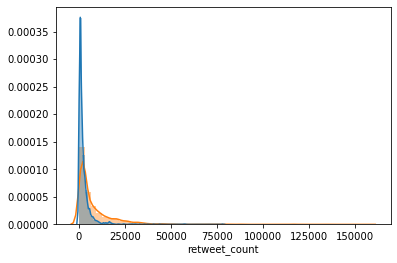

In [166]:
base_color= sns.color_palette()[0]
base_color_1= sns.color_palette()[1]
sns.distplot(twitter_archive_clean['fav_count'], color=base_color_1)
sns.distplot(twitter_archive_clean['retweet_count'], color=base_color);

In [183]:
twitter_archive_clean.groupby([twitter_archive_clean.timestamp.dt.year.rename('year')]).agg('sum')

,tweet_id,rating_numerator,rating_denominator,fav_count,retweet_count
year,,,,,
2015,4.629205e+20,7042.0,7052.0,1544132.0,632925.0
2016,8.009166e+20,14498.0,11725.0,7062181.0,2386651.0
2017,3.376154e+20,7177.0,4025.0,7834926.0,1867612.0


In [190]:
# df['birthdate'].groupby([df.birthdate.dt.year, df.birthdate.dt.month]).agg('count')
time_series_twt_arch = twitter_archive_clean.groupby(twitter_archive_clean.timestamp.dt.to_period('M')).agg('sum')
time_series_twt_arch.reset_index(inplace=True)
time_series_twt_arch

,timestamp,tweet_id,rating_numerator,rating_denominator,fav_count,retweet_count
0,2015-11,2.006101e+20,3087.0,2992.0,350704.0,144972.0
1,2015-12,2.623103e+20,3955.0,4060.0,1193428.0,487953.0
2,2016-01,1.334836e+20,2234.0,2177.0,624157.0,226997.0
3,2016-02,8.738859e+19,1342.0,1320.0,445562.0,158550.0
4,2016-03,9.647675e+19,1630.0,1550.0,507375.0,173682.0
5,2016-04,4.320151e+19,675.0,650.0,237483.0,77280.0
6,2016-05,4.390495e+19,847.0,760.0,327470.0,110938.0
7,2016-06,6.991262e+19,974.0,941.0,795731.0,315177.0
8,2016-07,7.309728e+19,2976.0,1110.0,570026.0,193905.0
9,2016-08,4.820640e+19,694.0,630.0,563536.0,191171.0


In [207]:
def lineplot_x_2(x_axes, y1_axes, y2_axes, df):
    sns.set(style="darkgrid")
    plt.figure(figsize=(16,9))
    ax = sns.lineplot(x=x_axes, y=y1_axes, label=f"mean {y1_axes}", data=df)
    ax = sns.lineplot(x=x_axes, y=y2_axes, label=f"mean {y2_axes}", data=df)
    ax.set_title(f'Average {y1_axes} and {y2_axes} by month', fontsize=18)
    ax.set_xlabel('months')
    ax.set_ylabel('records')
    plt.xticks(rotation=90);

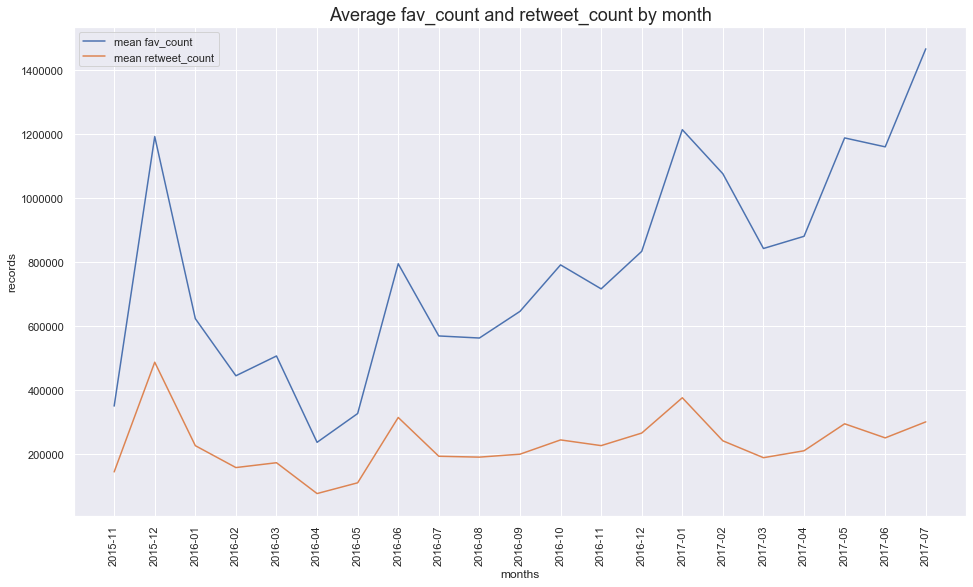

In [208]:
time_series_twt_arch.timestamp = time_series_twt_arch.timestamp.astype(str)
lineplot_x_2('timestamp', 'fav_count', 'retweet_count', time_series_twt_arch)

In [224]:
time_series_D_twt_arch = twitter_archive_clean.groupby(twitter_archive_clean.timestamp.dt.to_period('W').rename('week')).agg('sum')
time_series_D_twt_arch.reset_index(inplace=True)
time_series_D_twt_arch

,week,tweet_id,rating_numerator,rating_denominator,fav_count,retweet_count
0,2015-11-09/2015-11-15,1.998084e+18,24.0,30.0,2657.0,547.0
1,2015-11-16/2015-11-22,9.208109e+19,1193.0,1372.0,156957.0,65492.0
2,2015-11-23/2015-11-29,9.512030e+19,1716.0,1420.0,174150.0,71073.0
3,2015-11-30/2015-12-06,7.798151e+19,1077.0,1160.0,198688.0,90608.0
4,2015-12-07/2015-12-13,8.232269e+19,1265.0,1290.0,264014.0,104183.0
...,...,...,...,...,...,...
86,2017-07-03/2017-07-09,1.059423e+19,144.0,120.0,355049.0,66025.0
87,2017-07-10/2017-07-16,1.239756e+19,180.0,140.0,311030.0,62948.0
88,2017-07-17/2017-07-23,8.878480e+18,128.0,100.0,320799.0,68637.0
89,2017-07-24/2017-07-30,1.157466e+19,168.0,130.0,388839.0,80555.0


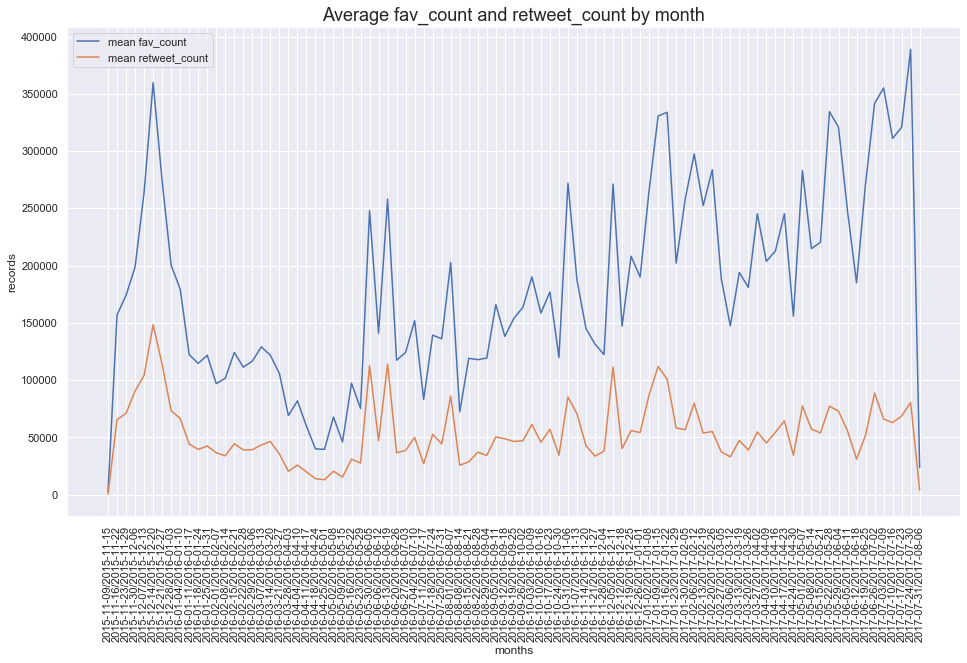

In [225]:
time_series_D_twt_arch.week = time_series_D_twt_arch.week.astype(str)
lineplot_x_2('week', 'fav_count', 'retweet_count', time_series_D_twt_arch);

In [246]:
tweet_by_hour = twitter_archive_clean.groupby(by=twitter_archive_clean.timestamp.dt.hour.rename('hour')).agg('median')
tweet_by_hour.reset_index(inplace=True)
tweet_by_hour

,hour,tweet_id,rating_numerator,rating_denominator,fav_count,retweet_count
0,0,753026973505581056,12.0,10.0,7276.0,2017.0
1,1,724588712124911616,11.0,10.0,4294.0,1244.5
2,2,688728072865097728,10.0,10.0,2302.0,718.0
3,3,679511351870550016,10.0,10.0,2322.5,720.5
4,4,676263575653122048,10.0,10.0,2019.5,623.0
5,5,677716515794329600,10.0,10.0,2058.0,721.0
6,6,682088079302213632,13.0,10.0,6064.0,1970.0
7,12,868444605766936576,13.0,10.0,NaN,NaN
8,13,850333567704068096,13.0,10.0,682.0,353.0
9,14,710117014656950272,11.0,10.0,3168.5,853.5


In [252]:
tweet_by_hour.hour = tweet_by_hour.hour.astype(str)
tweet_by_hour.hour = tweet_by_hour['hour'].str.zfill(2)

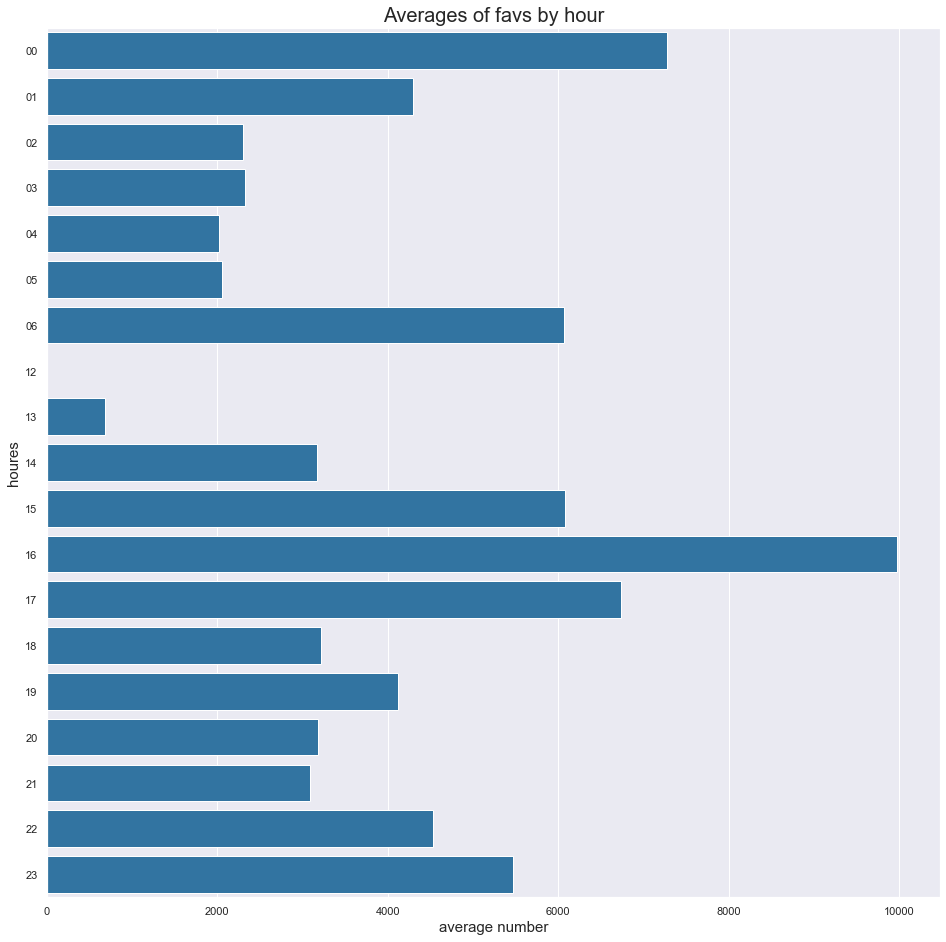

In [253]:

plt.figure(figsize=(16,16))
ax=sns.barplot(x='fav_count', y= tweet_by_hour.hour, data=tweet_by_hour, orient='h', color=base_color)
ax.set_title('Averages of favs by hour', fontsize=20)
ax.set_xlabel('average number', fontsize=15)
ax.set_ylabel('houres', fontsize=15);

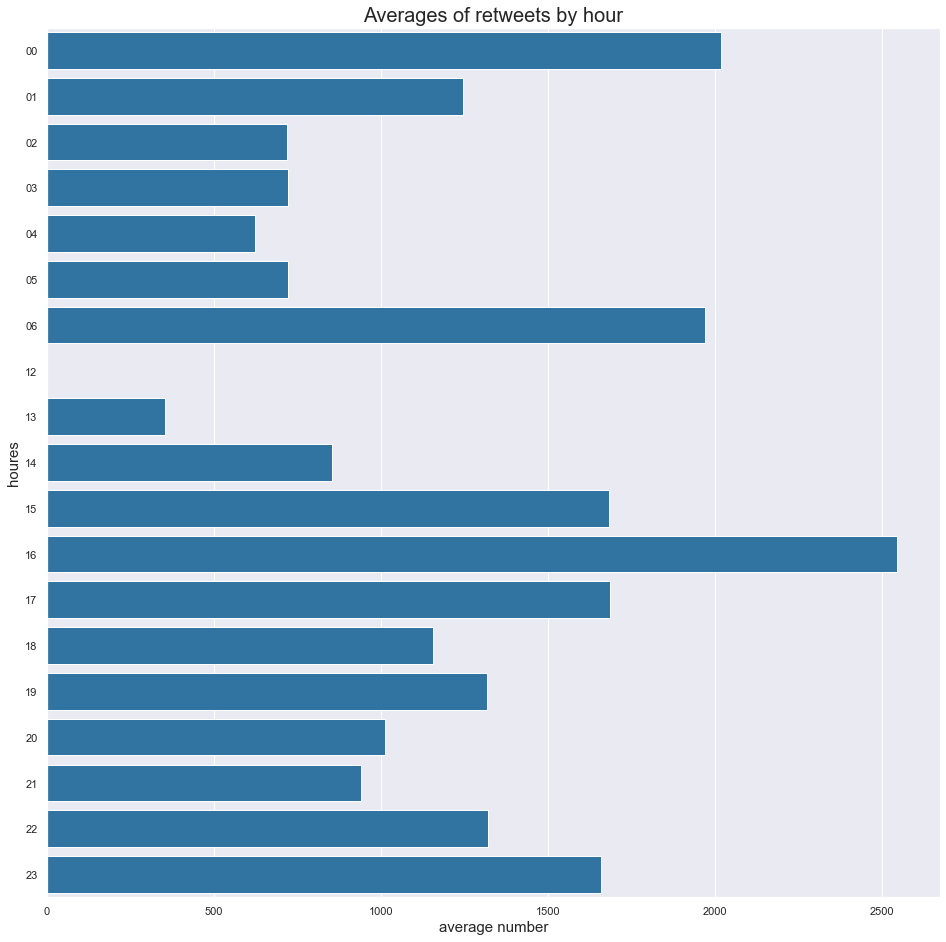

In [254]:
tweet_by_hour.hour = tweet_by_hour.hour.astype(str)
plt.figure(figsize=(16,16))
ax=sns.barplot(x='retweet_count', y= tweet_by_hour.hour, data=tweet_by_hour, orient='h', color=base_color)
ax.set_title('Averages of retweets by hour', fontsize=20)
ax.set_xlabel('average number', fontsize=15)
ax.set_ylabel('houres', fontsize=15);

In [255]:
image_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [261]:
dog_type = list(image_pred_clean.p1.value_counts().head(25).index)

In [263]:
top_25_dogs = image_pred_clean.loc[image_pred_clean.p1.isin(dog_type)]


In [274]:
dog_type = list(top_25_dogs.groupby(by='p1').agg('median').sort_values(by='p1_conf', ascending=False).index)

In [285]:
def boxplot(x_axes, y_axes, df, order=None):
    sns.set(style='darkgrid')
    plt.figure(figsize=(16,9))
    ax = sns.boxplot(x=x_axes, y=y_axes, orient= "h", data=df, order=order, color=base_color)
    ax.set_title(f'{x_axes} by {y_axes}', fontsize=18)
    ax.set_xlabel(f'{x_axes}')
    ax.set_ylabel(f'{y_axes}');

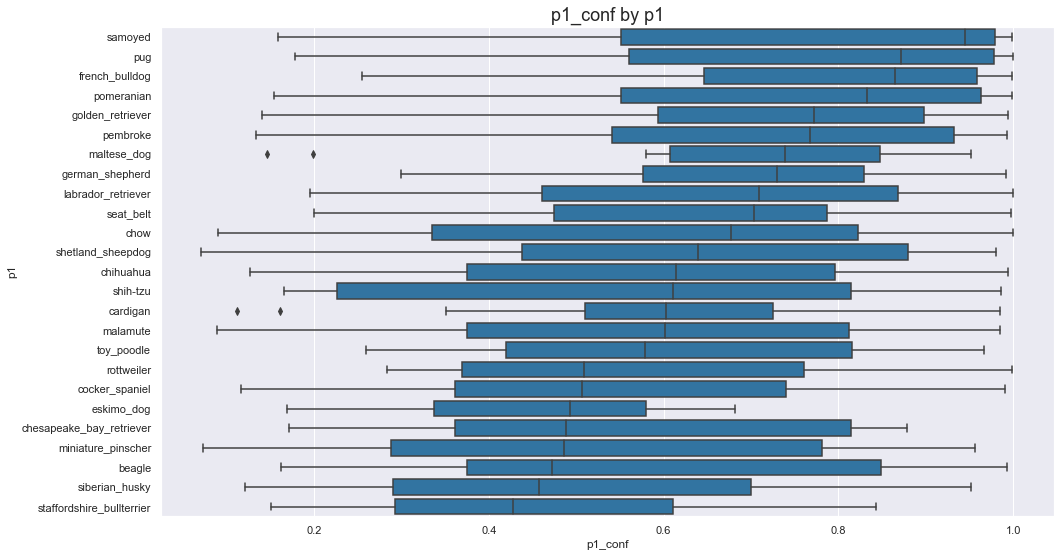

In [286]:
boxplot( 'p1_conf', 'p1', top_25_dogs, dog_type )